In [1]:
import networkx as nx
import collections
import matplotlib.pyplot as plt
from community import community_louvain
import os
import random

In [2]:
files = sorted([f for f in os.listdir('./Data/ants_proximity_weighted/') if f.endswith('.graphml')])
random.seed(42)
idx = [i * 41 + random.randint(0, 41) for i in range(6)]
graph_path = [files[i] for i in idx]
graph_path

['weighted_ant_mersch_colony1_day41.graphml',
 'weighted_ant_mersch_colony2_day08.graphml',
 'weighted_ant_mersch_colony3_day02.graphml',
 'weighted_ant_mersch_colony4_day18.graphml',
 'weighted_ant_mersch_colony5_day16.graphml',
 'weighted_ant_mersch_colony6_day15.graphml']

#### Plot Degree Distribution

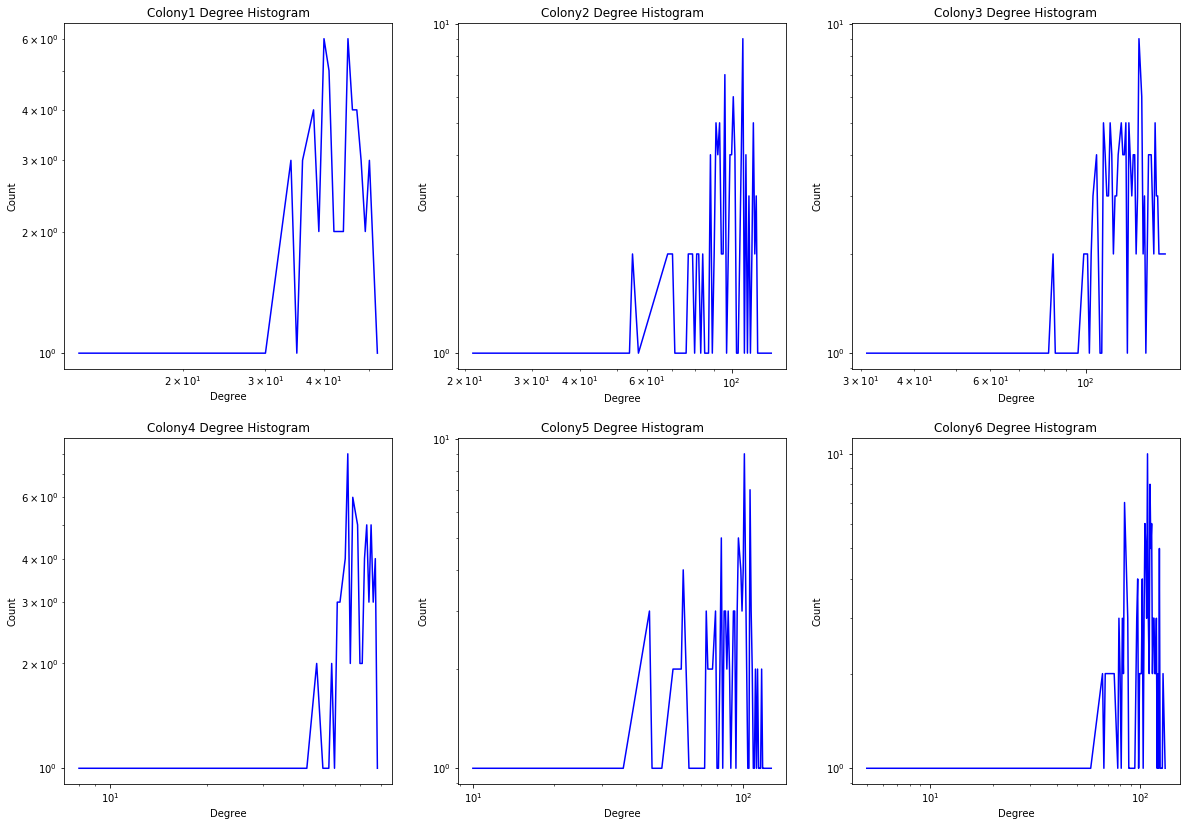

In [3]:
fig, axes = plt.subplots(2, 3, figsize = (20, 14))
for i, g in enumerate(graph_path):
    G = nx.readwrite.graphml.read_graphml(os.path.join('./Data/ants_proximity_weighted/', g))
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    axis = axes[i // 3, i % 3]
    axis.loglog(deg, cnt, color='b')
    axis.set_title("Colony" + str(i + 1) + " Degree Histogram")
    axis.set_ylabel("Count")
    axis.set_xlabel("Degree");

#### Plot Clustering Coefficient Histogram

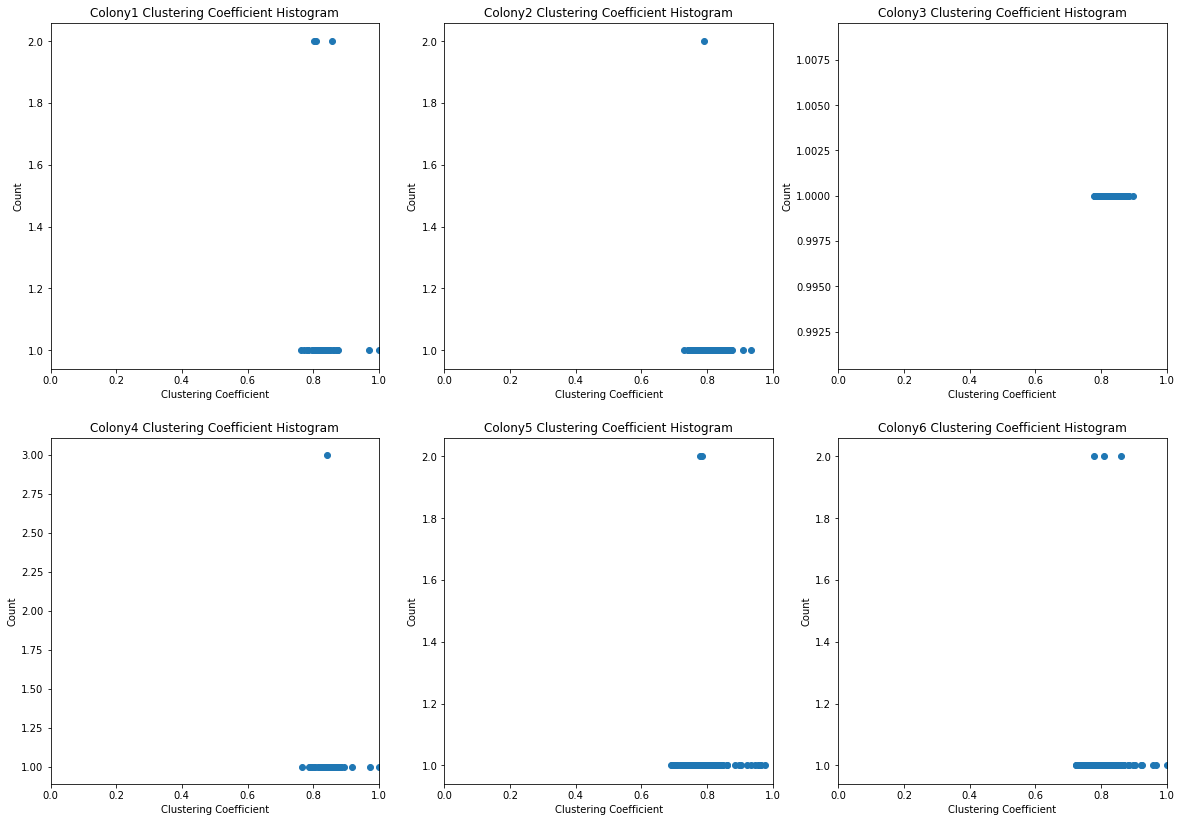

In [4]:
fig, axes = plt.subplots(2, 3, figsize = (20, 14))
for i, g in enumerate(graph_path):
    G = nx.readwrite.graphml.read_graphml(os.path.join('./Data/ants_proximity_weighted/', g))
    clustering = nx.clustering(G)
    coeffSequence = sorted([c for c in clustering.values()], reverse = True)
    coefficient_count = collections.Counter(coeffSequence)
    coeff, coeff_count = zip(*coefficient_count.items())
    axis = axes[i // 3, i % 3]
    axis.scatter(coeff, coeff_count)
    axis.set_title("Colony" + str(i + 1) + ' Clustering Coefficient Histogram');
    axis.set_ylabel('Count');
    axis.set_xlabel('Clustering Coefficient')
    axis.set_xlim((0, 1))

#### Plot Degree Centrality Histogram

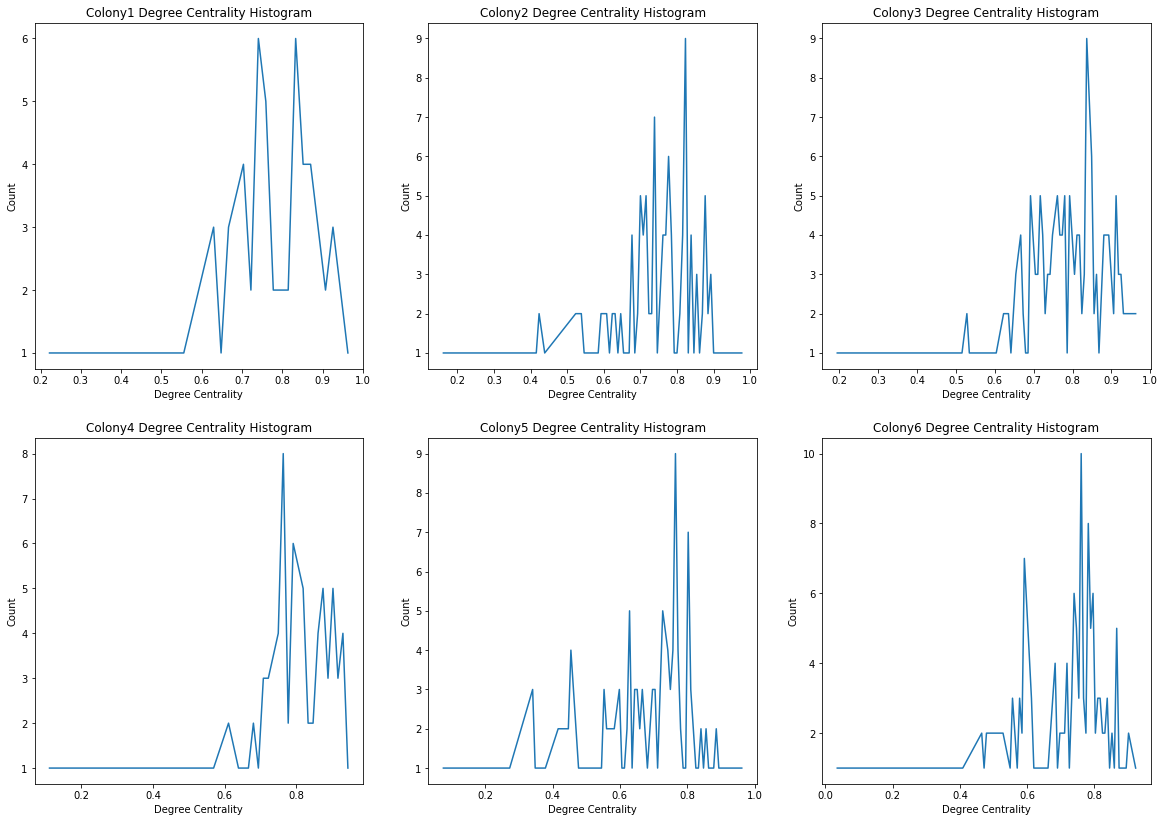

In [5]:
fig, axes = plt.subplots(2, 3, figsize = (20, 14))
for i, g in enumerate(graph_path):
    G = nx.readwrite.graphml.read_graphml(os.path.join('./Data/ants_proximity_weighted/', g))
    degree_centrality = nx.degree_centrality(G)
    centralitySequence = sorted([c for c in degree_centrality.values()], reverse = True)
    centralityCount = collections.Counter(centralitySequence)
    centra, centra_count = zip(*centralityCount.items())
    axis = axes[i // 3, i % 3]
    axis.plot(centra, centra_count)
    axis.set_title("Colony" + str(i + 1) + ' Degree Centrality Histogram')
    axis.set_ylabel('Count')
    axis.set_xlabel('Degree Centrality');

#### Plot the Betweenness Centrality Histogram 

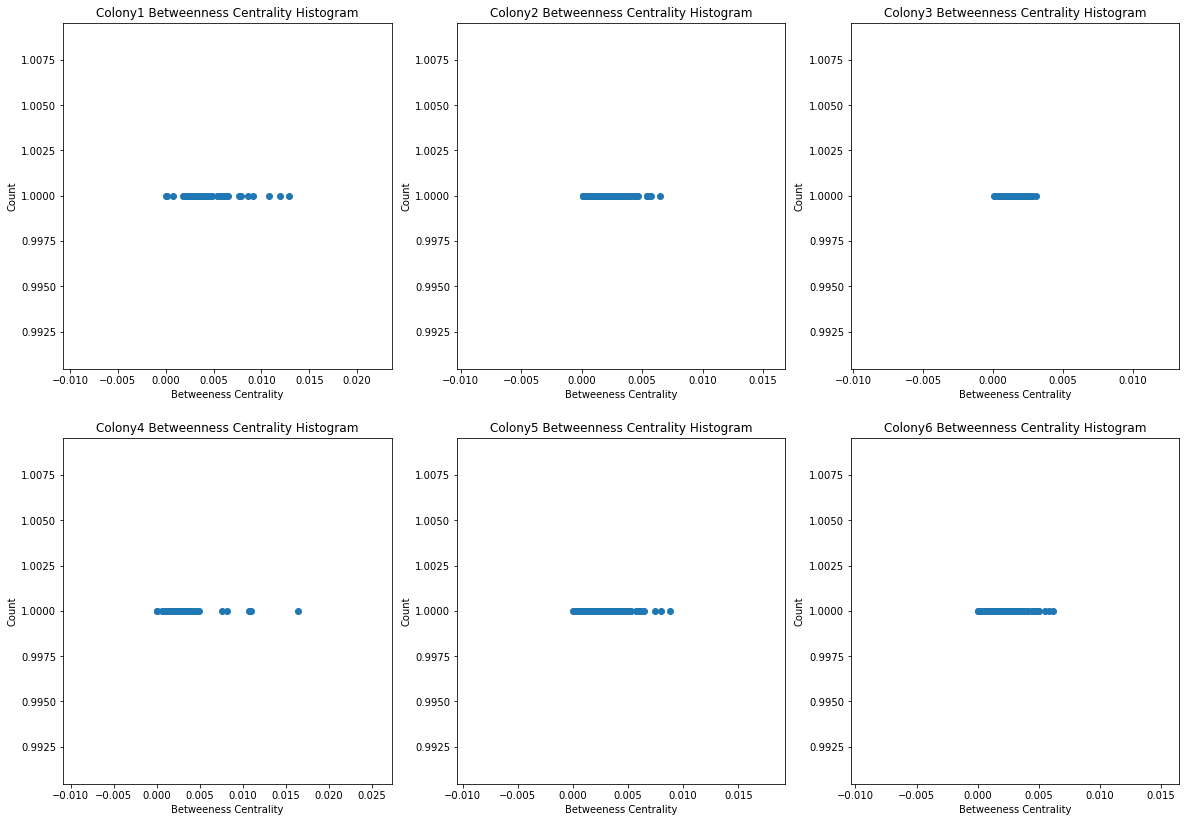

In [6]:
fig, axes = plt.subplots(2, 3, figsize = (20, 14))
for i, g in enumerate(graph_path):
    G = nx.readwrite.graphml.read_graphml(os.path.join('./Data/ants_proximity_weighted/', g))
    betweenness_centrality = nx.betweenness_centrality(G)
    betweennessSequence = sorted([b for b in betweenness_centrality.values()], reverse = True)
    betweennessCount = collections.Counter(betweennessSequence)
    between, between_count = zip(*betweennessCount.items())
    axis = axes[i // 3, i % 3]
    axis.scatter(between, between_count)
    axis.set_title("Colony" + str(i + 1) + ' Betweenness Centrality Histogram')
    axis.set_ylabel('Count')
    axis.set_xlabel('Betweeness Centrality');

#### Plot the Eigenvector Centrality Histogram

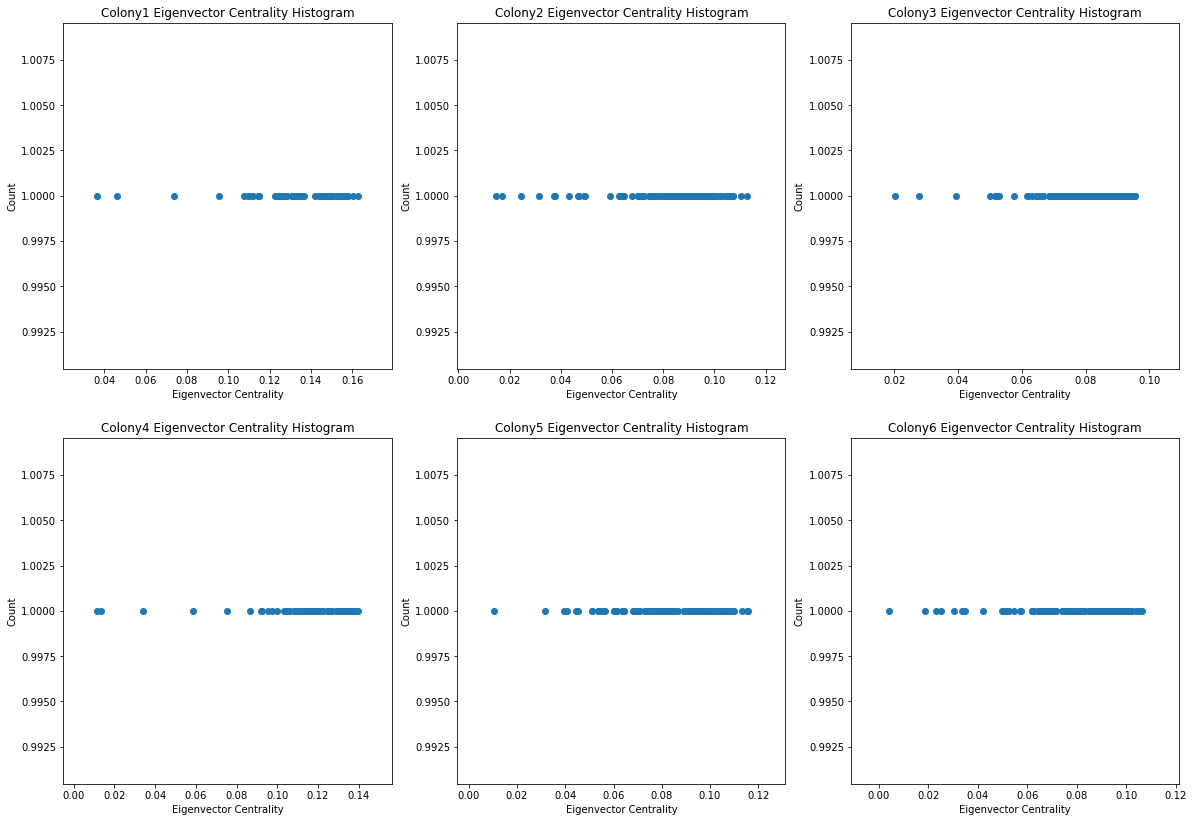

In [7]:
fig, axes = plt.subplots(2, 3, figsize = (20, 14))
for i, g in enumerate(graph_path):
    G = nx.readwrite.graphml.read_graphml(os.path.join('./Data/ants_proximity_weighted/', g))
    eigenvector_centrality = nx.eigenvector_centrality(G)
    eigenvectorSequence = sorted([e for e in eigenvector_centrality.values()], reverse = True)
    eigenvectorCount = collections.Counter(eigenvectorSequence)
    eigen, eigen_count = zip(*eigenvectorCount.items())
    axis = axes[i // 3, i % 3]
    axis.scatter(eigen, eigen_count)
    axis.set_title("Colony" + str(i + 1) + ' Eigenvector Centrality Histogram')
    axis.set_ylabel('Count')
    axis.set_xlabel('Eigenvector Centrality');

#### Community Detection

In [8]:
for i, g in enumerate(graph_path):
    G = nx.readwrite.graphml.read_graphml(os.path.join('./Data/ants_proximity_weighted/', g))
    communities = community_louvain.best_partition(G)
    for n in G.nodes():
        G.nodes[n]['group'] = communities[n]
    save_path = os.path.join('./Ants/', g[:-13] + 'community.graphml')
    nx.write_graphml(G, save_path)